In [1]:
import uqtestfuns as uqtf
import matplotlib.pyplot as plt
import numpy as np

(prob-input:univariate-distributions:uniform)=
# Uniform Distribution

The uniform distribution is a two-parameter continuous probability distribution.
The table below summarizes some important aspects of the distribution.

|                      |                                                                                                          |
|---------------------:|----------------------------------------------------------------------------------------------------------|
|         **Notation** | $X \sim \mathcal{U}(a, b)$                                                                               |
|       **Parameters** | $a \in (-\infty, b)$ (lower bound)                                                                       |
|                      | $b \in (a, \infty)$ (upper bound)                                                                        |
|  **{term}`Support`** | $\mathcal{D}_X = [a, b] \subset \mathbb{R}$                                                              |
|      **{term}`PDF`** | $f_X (x; a, b) = \begin{cases} \frac{1}{b - a} & x \in [a, b] \\ 0 & x \notin [a, b] \end{cases}$        |
|      **{term}`CDF`** | $F_X (x; a, b) = \begin{cases} 0 & x < a \\ \frac{x - a}{b - a} & x \in [a, b] \\ 1 & x > b \end{cases}$ |
|     **{term}`ICDF`** | $F^{-1}_X (x; a, b) = a + (b - a) \, x$                                                                  |


The plots of probability density functions (PDFs),
sample histogram (of $5'000$ points),
cumulative distribution functions (CDFs),
and inverse cumulative distribution functions (ICDFs) for different parameter
values are shown below.

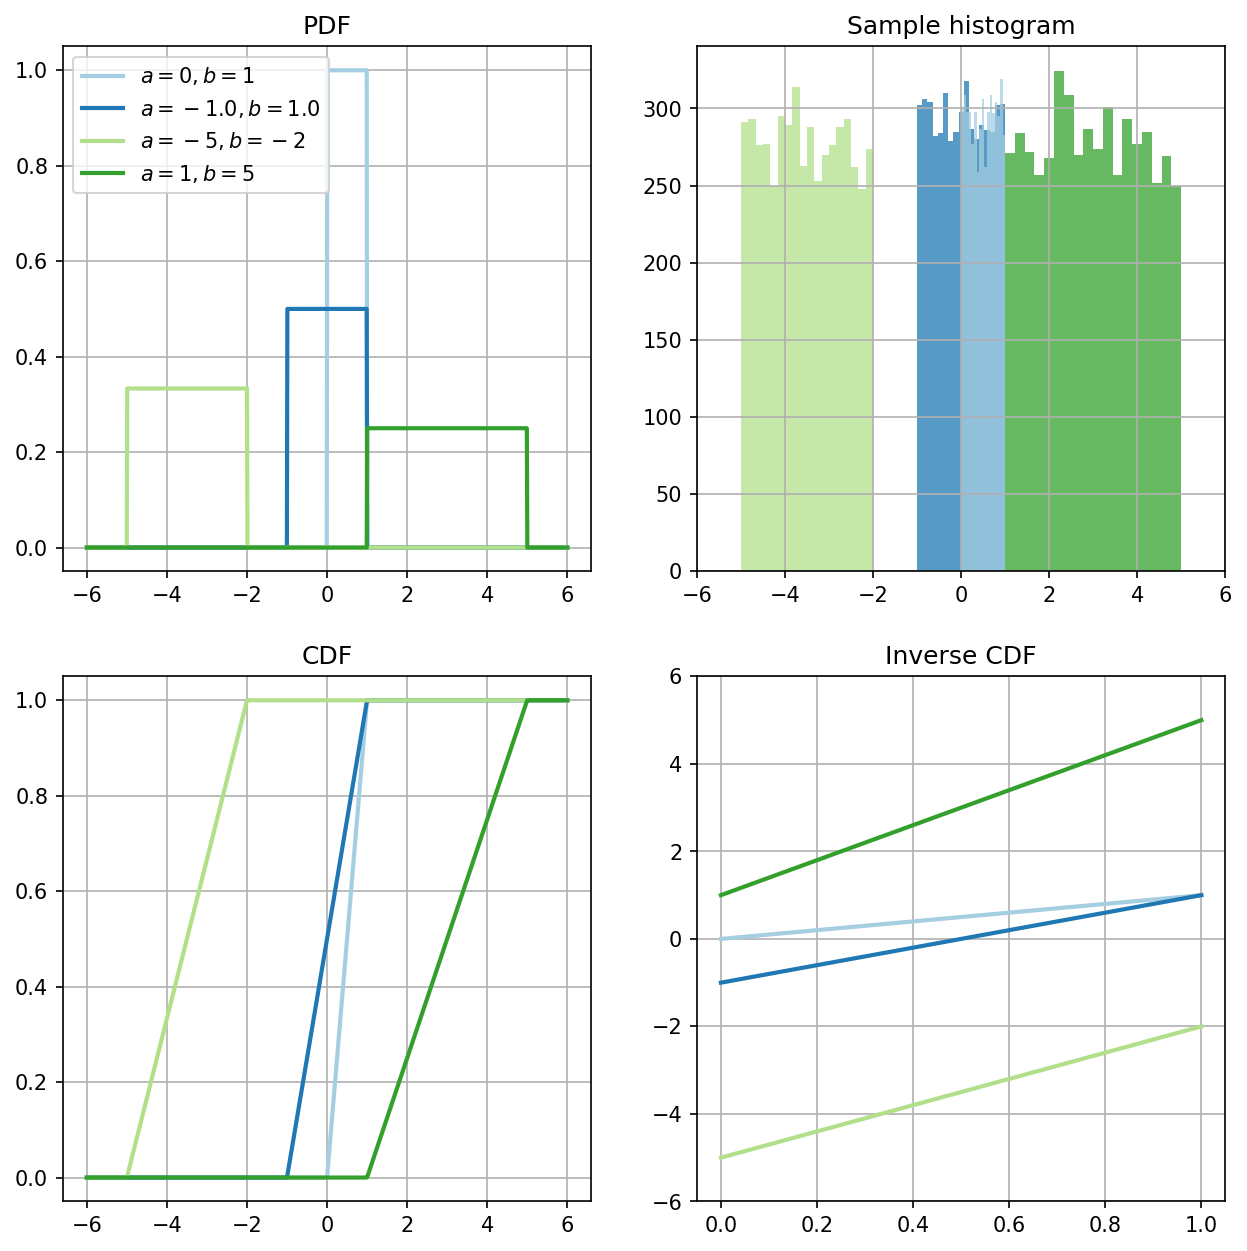

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

parameters = [[0, 1], [-1, 1.0], [-5, -2], [1, 5]]
colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"]

univ_dists = []
for parameter in parameters:
    univ_dists.append(uqtf.UnivDist(distribution="uniform", parameters=parameter))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# --- PDF
xx = np.linspace(-6, 6, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[0, 0].plot(
        xx,
        univ_dist.pdf(xx),
        color=colors[i],
        label=f"$a = {univ_dist.parameters[0]}, b={univ_dist.parameters[1]}$",
        linewidth=2,
    )
axs[0, 0].legend();
axs[0, 0].grid();
axs[0, 0].set_title("PDF");

# --- Sample histogram
sample_size = 5000
np.random.seed(42)
for col, univ_dist in zip(reversed(colors), reversed(univ_dists)):
    axs[0, 1].hist(
        univ_dist.get_sample(sample_size),
        color=col,
        bins="auto",
        alpha=0.75
    )
axs[0, 1].grid();
axs[0, 1].set_xlim([-6, 6]);
axs[0, 1].set_title("Sample histogram");

# --- CDF
xx = np.linspace(-6, 6, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 0].plot(
        xx,
        univ_dist.cdf(xx),
        color=colors[i],
        linewidth=2,
    )
axs[1, 0].grid();
axs[1, 0].set_title("CDF");

# --- Inverse CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 1].plot(
        xx,
        univ_dist.icdf(xx),
        color=colors[i],
        linewidth=2
    )
axs[1, 1].grid();
axs[1, 1].set_ylim([-6, 6]);
axs[1, 1].set_title("Inverse CDF");

plt.gcf().set_dpi(150)